# Исследование надёжности заёмщиков
Заказчик — кредитный отдел банка. Необходимо определить влияет ли семейное положение и количество детей клиента на погашения кредита в срок. 
Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Информация о входных данных
Входные данные от банка — статистика о платёжеспособности клиентов.
Описание входных данных: 
* __``children``__ — *количество детей в семье*
* __``days_employed``__ — *общий трудовой стаж в днях*
* __``dob_years``__ — *возраст клиента в годах*
* __``education``__ — *уровень образования клиента*
* __``education_id``__ — *идентификатор уровня образования*
* __``family_status``__ — *семейное положение*
* __``family_status_id``__ — *идентификатор семейного положения*
* __``gender``__ — *пол клиента*
* __``income_type``__ — *тип занятости*
* __``debt``__ — *имел ли задолженность по возврату кредитов*
* __``total_income``__ — *ежемесячный доход*
* __``purpose``__ — *цель получения кредита*

## Оглавление

* [Шаг 1. Изучение входных данных](#num1)
* [Шаг 2. Предобработка данных](#num2)
    * [2.1. Обработка дубликатов](#num21)
    * [2.2. Обработка пропусков](#num22)
    * [2.3. Дальнейшая обработка данных](#num23)
    * [2.4. Замена типа данных](#num24)
    * [2.5. Лемматизация](#num25)
    * [2.6. Категоризация данных](#num26)
* [Шаг 3. Анализ зависимостей характеристик заёмщика](#num3)
    * [3.1. Определение зависимости между наличием детей и возвратом кредита в срок](#num31)
    * [3.2. Определение зависимости между семейным положением и возвратом кредита в срок](#num32)
    * [3.3. Определение зависимости между уровнем дохода и возвратом кредита в срок](#num33)
    * [3.4. Влияние цели кредита на его возврат в срок](#num34)
* [Шаг 4. Общий вывод](#num4)

<a id="num1"></a>
## Шаг 1. Изучение входных данных
Импортирую все необходимые библиотеки и создаю DataFrame с названием __'data'__, в котром будет хранится исходный датасет.

In [1]:
import pandas as pd              # Импортирую библиотеку Pandas
import matplotlib.pyplot as plt  # Импортирую библиотеку для визуализации
data = pd.read_csv('/datasets/data.csv')       # Создаю DataFrame с именем data

ClrG = '\033[32m'                # Инициализирую переменную для вывода текста зелёным цветом 
ClrDef = '\033[0m'               # Инициализирую переменную для вывода текста с дефолтными настройками

# Создаю функцию для получения основной информации о датафрейме
def datainfo(dataframe):
    display(dataframe.head())
    display(dataframe.describe())
    dataframe.info()

Вызываю функцию __datainfo()__ для детального изучения структуры таблицы __'data'__

In [2]:
datainfo(data)    # Получаю основную информацию о таблице

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


#### Получаю следующую структуру таблицы:
* Количество столбцов: __12__
* Количество строк: __21525__
* Тип данных в столбцах: __float64(2), int64(5), object(5)__
* Имеются пропущенные значения

Выведу первые 20 строк таблицы для предварительного анализа данных с помощью метода __.head()__

In [3]:
data.head(20)  # Вывожу первые 20 строк таблицы 'data'

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


#### Проанализировав полученную таблицу, следует обозначить следующие проблемы:
* Столбец __'days_employed'__ имеет пропущенные значения
* Столбец __'total_income'__ имеет пропущенные значения
* Столбец __'days_employed'__ имеет отрицательные значения. Исходя из логики, отрицательные значения являются не корректными
* В столбце __'education'__ значения написаны маленькиими и большими буквами, необходимо привести их к единому регистру

Вызываю метод __'.columns'__ для изучения корректности заголовков таблицы

In [4]:
data.columns    # Вывожу список заголовков таблицы 'data'

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Все наименования столбцов имеют корректный вид и пригодны для дальнейшей работы

Воспользуюсь методом __.duplicated()__ для подсчёта дубликатов

In [5]:
print('Количество дубликатов:', ClrG, data.duplicated().sum(), ClrDef)   # Вывожу количество дубликатов таблицы 'data'

Количество дубликатов:  54 


Вызываю метод __.isnull()__ для подсчета пропущенных значений в таблице __'data'__

In [6]:
print(data.isnull().sum())   # Вывожу список количества пропущенных значений таблицы 'data'

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


В столбцах __'days_employed'__ и __'total_income'__ имеются пропущенные значения

Проанализирую столбцы __'children', 'dob_years', 'education_id', 'family_status_id', 'debt'__ на аномальные значения. Для этого воспользуюсь методом __.unique()__ и визуально изучу полученные результаты 

In [7]:
# Список столбцов 
columns_list = ['children', 'dob_years', 'education_id', 'family_status_id', 'debt']
# Получение уникальных значений для каждого столбца
print('Уникальные значения в столбце:')
for x in columns_list:
    print(ClrG, x, ClrDef, data[x].unique())

Уникальные значения в столбце:
 children  [ 1  0  3  2 -1  4 20  5]
 dob_years  [42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]
 education_id  [0 1 2 3 4]
 family_status_id  [0 1 2 3 4]
 debt  [0 1]


### Вывод
Проанализировав таблицу __'data'__ получаю следующую информацию:
#### Cтруктура анализируемой таблицы:
* *Количество столбцов:* __12__
* *Количество строк:* __21525__
* *Тип данных в столбцах:* __float64(2), int64(5), object(5)__

#### Выявленные проблемы:
* Количество дубликатов: __54__
* Столбец __'days_employed'__ имеет отрицательные значения. *(Исходя из логики, отрицательные значения в данном столбце являются не корректными)*
* Столбец __'days_employed'__ имеет пропущенные значения
* Столбец __'total_income'__ имеет пропущенные значения
* В столбце __'education'__ значения написаны маленькиими и большими буквами, необходимо привести их к единому регистру
* Столбец __'children'__ содержит аномальные значения: __-1__ и __20__
* Столбец __'days_employed'__ содержит информация в некорректном виде. *(Необходимо перевести Часы в Дни)*

<a id="num2"></a>
## Шаг 2. Предобработка данных
<a id="num21"></a>
### 2.1 Обработка дубликатов
Воспользуюсь методом __.duplicated()__ чтобы убедиться в наличие дубликатов

In [8]:
 print('Количество дубликатов:', ClrG, data.duplicated().sum())   # Вывожу количество дубликатов таблицы 'data'

Количество дубликатов:  54


Воспользуюсь методом __.drop_duplicates()__ для удаления дубликатов и проверю наличие дубликатов в таблице

In [9]:
data = data.drop_duplicates().reset_index(drop=True)    # Удаляю дубликаты в таблице 'data' с помощью метода .drop_duplicates()
print('Количество дубликатов:', ClrG, data.duplicated().sum())   # Вывожу количество дубликатов таблицы 'data'

Количество дубликатов:  0


### Вывод
В ходе анализа было выявлено 54 дубликата. Дубликаты были обнаружены с помощью метода __.duplicated()__. Я использовал данный метод потому что исходя из данных в таблице, использование метода __.value_counts()__ считаю невозможным. С помощью метода __.drop_duplicates()__ я успешно избавился от дубликатов. Теперь данные пригодны для дальнейшего анализа.

Из возможных причин появления дубликов могу предположить два основных варианта:
1. Они появились в результате того, что один и тот же человек оставлял несколько полностью идентичных заявок на получение кредита
2. Дубликаты появились в следствии сбоя при загрузке данных в систему (что считаю менее вероятным чем первый вариант)

<a id="num22"></a>
### 2.2 Обработка пропусков
#### Проверяю стобец 'days_employed' на пропущенные значения
Воспользуюсь методом __.isnull()__ для поиска пропущенных значений

In [10]:
print('Пропущенных значений в "days_employed":', ClrG, data['days_employed'].isnull().sum()) # Поиск пустых значений в столбце 'days_employed'

Пропущенных значений в "days_employed":  2120


Исходя из описания данных, столбец __'days_employed'__ — содержит в себе данные об общем трудовом стаже в днях. Пустые значения могли возникнуть по нескольким причинам:

* Отсутствие трудового стажа в связи с Отсутствием трудовой деятельности
* Отсутствие трудового стажа в связи с Ошибкой при загрузке данных
* Отсутствие трудового стажа в связи с тем, что Клиент не сообщил данную информацию

Исходя из вышесказанного я принимаю решение о замене пропущенных значений на "среднее значение дней трудового стажа по категории трудовой деятельности" - 'income_type'

Прежде чем заменить пропущенные значения столбца __'days_employed'__ необходимо избавиться от __отрицательных значений__ данного столбца. Для этого воспользуюсь методом __.abs()__, который применю к столбцу __'days_employed'__. И выведу 20 строк полученного столбца.

In [11]:
data['days_employed'] = data['days_employed'].abs()   # Применяю метод .abs() к столбцу 'days_employed' для избавления от отрицательных значений
print(data['days_employed'].head(20))   # Вывожу первые 20 строк столбца 'days_employed'

0       8437.673028
1       4024.803754
2       5623.422610
3       4124.747207
4     340266.072047
5        926.185831
6       2879.202052
7        152.779569
8       6929.865299
9       2188.756445
10      4171.483647
11       792.701887
12              NaN
13      1846.641941
14      1844.956182
15       972.364419
16      1719.934226
17      2369.999720
18    400281.136913
19     10038.818549
Name: days_employed, dtype: float64


Отрицательные значения успешно изменены на положительные. Теперь можно избавляться от пропусков

#### Замена пропущенных значений в столбце 'days_employed'
Создаю временную переменную __mean_days_employed__ - которой присваиваю среднее значение трудового стажа по каждому типу занятости

In [12]:
# Создаю переменную 'mean_days_employed' и Группирую таблицу по столбцу 'income_type', Далее применяю метод .mean() к столбцу 'days_employed'
mean_days_employed = data.groupby(['income_type']).agg({'days_employed':'mean'})  
mean_days_employed    # Вывожу полученную таблицу

,days_employed
income_type,
безработный,366413.652744
в декрете,3296.759962
госслужащий,3399.896902
компаньон,2111.524398
пенсионер,365003.491245
предприниматель,520.848083
сотрудник,2326.499216
студент,578.751554


В результате вычислений получаю таблицу со средним значением трудового стажа в днях для каждого типа занятости, теперь можно присвоить эти значения всем пропущенным значениям в столбце __'days_employed'__

In [13]:
# Создаю цикл который для каждого пропущенного значения в столбце 'days_employed' применяет замену на среднее значение
for inc_type in mean_days_employed.index:
    data.loc[data['income_type'] == inc_type,'days_employed']=data.loc[data['income_type'] == inc_type,'days_employed'].fillna(mean_days_employed.loc[inc_type, 'days_employed'])

# Поиск пустых значений в столбце 'days_employed'
print('Пропущенных значений в "days_employed":', ClrG, data['days_employed'].isnull().sum(), 'строк')

Пропущенных значений в "days_employed":  0 строк


Вызываю метод __.info()__ для визуального анализа результата полученных результатов

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
children            21471 non-null int64
days_employed       21471 non-null float64
dob_years           21471 non-null int64
education           21471 non-null object
education_id        21471 non-null int64
family_status       21471 non-null object
family_status_id    21471 non-null int64
gender              21471 non-null object
income_type         21471 non-null object
debt                21471 non-null int64
total_income        19351 non-null float64
purpose             21471 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Пропущенные значения в столбце __'days_employed'__ были успешно заполнены.

#### Проверяю стобец 'total_income' на пропущенные значения
Воспользуюсь методом __.isnull()__ для поиска пропущенных значений

In [15]:
# Поиск пустых значений в столбце 'total_income'
print('Пропущенных значений в "total_income":', ClrG, data['total_income'].isnull().sum(), ClrDef) 

# Поиск значений равных 0 в столбце 'total_income'
print('Строк со значением "0" в столбце total_income:', ClrG, data.loc[data['total_income'] == 0]['total_income'].count()) 

Пропущенных значений в "total_income":  2120 
Строк со значением "0" в столбце total_income:  0


Таким образом в столбце __'total_income'__ есть пропущенные значения и нету нулевых значений.

Стоит обратить внимание на то, что количество пропущенных значений в столбцах __'days_employed'__ и __'total_income'__ __одинаковое__. Вероятнее всего в этом есть связь и пропуски допущены в одних и тех же строках. Это может быть связано с тем, что клиенты не предоставили трудовую книжку сотрудникам банка. Соответственно данные о "Общем трудовом стаже" и "Ежемесячном доходе" отсутствуют. 

Но так как столбец __'income_type' не содержит пустых значений__, следовательно клиенты непредоставившие информацию о доходе и трудовом стаже, предоставили информацию о своём Типе занятости - __'income_type'__ и это поможет в дальнейшем анализе.

#### Замена от пропущенных значений в столбце 'total_income'

Для избавления от пропущенных значений в столбце __'total_income'__, посчитаю среднее значение ежемесячного дохода основываясь на данных столбца __'income_type' - "Тип занятости"__ и присвою пропущенным значениям среднее значение для каждого типа занятости.

Для этого необходимо вычислить среднее значение для каждого типа занятости.

Создам временную переменную __mean_total_income__ - которой присвою среднее значение ежемесячного дохода по каждому типу занятости

In [16]:
# Создаю переменную 'mean_total_income' и Группирую таблицу по столбцу 'income_type', Далее применяю метод .mean() к столбцу 'total_income'
mean_total_income = data.groupby(['income_type']).agg({'total_income':'mean'})   
mean_total_income

,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,170898.309923
компаньон,202417.461462
пенсионер,137127.465690
предприниматель,499163.144947
сотрудник,161380.260488
студент,98201.625314


В результате вычислений получаю таблицу со __средним ежемесячным доходом для каждого типа занятости__, теперь можно присвоить эти значения всем __пропущенным значениями в столбце 'total_income'__. Для этого создам цикл, который для каждого пропущенного значения в столбце __'total_income'__ применяет замену значения из столбца __'mean_total_income'__.

In [17]:
# Создаю цикл который для каждого пропущенного значения в столбце 'total_income' применяет замену из соответствующего столбца таблицы 'mean_total_income' 
for inc_type in mean_total_income.index:
    data.loc[data['income_type'] == inc_type,'total_income']=data.loc[data['income_type'] == inc_type,'total_income'].fillna(mean_total_income.loc[inc_type, 'total_income'])

# Проверяю количество пропущенных значений в столбце 'total_income'
print('Пропущенных значений в "total_income":', ClrG, data['total_income'].isnull().sum())

Пропущенных значений в "total_income":  0


Вызываю метод __.info()__ для визуального анализа результата проделанной работы

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
children            21471 non-null int64
days_employed       21471 non-null float64
dob_years           21471 non-null int64
education           21471 non-null object
education_id        21471 non-null int64
family_status       21471 non-null object
family_status_id    21471 non-null int64
gender              21471 non-null object
income_type         21471 non-null object
debt                21471 non-null int64
total_income        21471 non-null float64
purpose             21471 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Пропущенные значения в столбце __'total_income'__ успешно заменены на среднее значение по Типу занятости.

### Вывод

В ходе анализа были выявлены пропущенные значения в столбцах __'days_employed'__ и __'total_income'__. Пропущенные значения в столбце __'days_employed'__ могли возникнуть по следующим причинам:

* Отсутствие трудового стажа в связи с Отсутствием трудовой деятельности
* Отсутствие трудового стажа в связи с Ошибкой при загрузке данных
* Отсутствие трудового стажа в связи с тем, что Клиент не сообщил данную информацию
Для обработки пропущенных значений в данном столбце я использовал __"среднее значение дней трудового стажа по категории трудовой деятельности" - 'income_type'__. То есть посчитал среднее значение для каждой категории из столбца __'income_type'__ и присвоил данные значения всем пропущенным значениям по категориям в столбце __'days_employed'__. 

Для обработки пропущенных значений в столбце __'total_income'__ я посчитал __"среднее значение ежемесячного дохода"__ основываясь на данных столбца __'income_type' - "Тип занятости"__ и присвоил пропущенным значениям, среднее значение по типу занятости.

Стоит обратить внимание на то, что __количество пропущенных значений в столбцах 'days_employed' и 'total_income' одинаковое__, это говорит о том, что __пропуски в двух столбцах взаимосвязаны и пропуски допущены в одних и тех же строках__. Я предполагаю, что отсутствие информации может быть связано с тем, что __клиенты не предоставили трудовую книжку__. Соответственно данные об "Общем трудовом стаже" и "Ежемесячном доходе" отсутствуют.

<a id="num23"></a>
### 2.3 Дальнейшая обработка данных

Теперь необходимо в столбце __'education'__ привести значения к единому нижнему регистру. Для этого воспользуюсь методом __.str.lower()__

In [19]:
data['education'] = data['education'].str.lower()  # Применяю метод .str.lower() к столбцу 'education'
print(data['education'].head(10))                  # Вывожу первые 10 строк столбца 'education' на экран

0     высшее
1    среднее
2    среднее
3    среднее
4    среднее
5     высшее
6     высшее
7    среднее
8     высшее
9    среднее
Name: education, dtype: object


Верхний регистр успешно заменён на нижний, теперь данные пригды для дальнейшего анализа.

Столбец __'children'__ имеет аномальные значения:  __-1__ и __20__
Воспользуюсь методом __.value_counts()__ и посчитаю количество уникальных значений в столбце __'children'__

In [20]:
print(data['children'].value_counts())   # Вывожу количество уникальных значений в столбце 'children'

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


В столбце __'children' 47 раз__ повторяется аномальное значение __-1__, по-моему мнению это ошибка при заполнении анкеты клиентами. Значение __-1__ это эквивалент значения __1__, поэтому необходимо __заменить отрицательные значения на положительные__. Значение __20__ в столбце __'children' встречается в 76 случаях__, что является практически невозможным. Необходимо все значения которые __равны 20__, __заменить на среднее значение по столбцу 'children'__.

#### Заменяю отрицательные значения в столбце 'children'

In [21]:
data['children'] = data['children'].abs()  # Заменяю отрицательные значения столбца 'children' на положительные
print(data['children'].value_counts())     # Вывожу на экран количество уникальных значений столбца 'children

0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64


Отрицательные значения успешно обработаны.

#### Замена аномальных значений в столбце 'children'

Теперь необходимо избавиться от аномального значения __'20'__. Логичнее всего было бы присвоить __всем значениям 20__ - новое значение равное __среднему значению по столбцу 'children'__, поэтому для начала вычислю среднее значение столбца.

In [22]:
# Получение списка уникальных значений количества детей
children_list = data['children'].unique()
# Вывожу среднее значение по столбцу 'children'
print('Среднее количество детей:', ClrG, '{:.1f}'.format(data['children'].mean()), ClrDef)
# Вывожу процент клиентов с количеством детей равным x from children_list
for x in children_list:
    print('Доля клиентов с количеством детей', ClrG, x, ': {:.2%}'.format(data[data['children'] == x]['children'].count() / len(data['children'])), ClrDef)

Среднее количество детей:  0.5 
Доля клиентов с количеством детей  1 : 22.62% 
Доля клиентов с количеством детей  0 : 65.70% 
Доля клиентов с количеством детей  3 : 1.54% 
Доля клиентов с количеством детей  2 : 9.56% 
Доля клиентов с количеством детей  4 : 0.19% 
Доля клиентов с количеством детей  20 : 0.35% 
Доля клиентов с количеством детей  5 : 0.04% 


Проанализировав полученные результаты, я принимаю решение о замене всех аномальных значений __с 20 детьми__, на значение: __1 ребёнок__. Так как доля аномальных значений составляет __0.35%__ от общего числа и среднее значение по столбцу составляет __0.54__.

Создаю функцию __'change_children'__, которая заменяет все значения равные __'20'__ в столбце __'children'__ на значение __'1'__

In [23]:
def change_children(row):               # Объявляю функцию 'change_children'

    childrens = row['children']         # Создаю переменную childrens

    if childrens == 20:                 # Условие функции: Если childrens = 20, то 
        childrens = 1                   # childrens приравнять к 1
        return childrens                # Возвращаем значение childrens
    else:                               # Иначе
        return childrens                # Возвращаем значение childrens

data['children'] = data.apply(change_children, axis=1)   # Применяем метод .apply с аргументом change_children к столбцу 'children'

print(data['children'].value_counts())     # Вывожу на экран количество уникальных значений столбца 'children

0    14107
1     4932
2     2052
3      330
4       41
5        9
Name: children, dtype: int64


Столбец __'children'__ избавлен от аномальных значений и годится для дальнейшего анализа.

#### Перевод значений столбца 'days_employed' в дни

Проанализировав таблицу я предполагаю, что значения в столбце __'days_employed'__ указаны __не в днях__, а __в часах__. Чтобы убедиться в этом изучу значения столбца более детально.

In [24]:
print('Трудовой стаж:')
print('Максимум', ClrG, '{:.2f}'.format(data['days_employed'].max()), ClrDef)   # Получаю максимальное значение столбца 'days_employed'
print('Среднее', ClrG, '{:.2f}'.format(data['days_employed'].mean()), ClrDef)       # Получаю среднее значение столбца 'days_employed'
print('Минимум', ClrG, '{:.2f}'.format(data['days_employed'].min()), ClrDef)    # Получаю минимальное значение столбца 'days_employed'

Трудовой стаж:
Максимум  401755.40 
Среднее  67194.80 
Минимум  24.14 


__Минимальное__ значение равно __24__. Если данное значение разделить на количество часов в сутках - __24 часа__, то получу __1 день__. Теперь нужно перевести значения из __Часов__ в __Дни__.

Для этого создаю функцию __'change_days_employed'__, которая каждое значение столбца __'days_employed'__ __разделит на 24__ и вернёт количество дней трудового стажа клиента.

In [25]:
def change_days_employed(row):     # Объявляю функцию 'change_days_employed'

    days = row['days_employed']    # Создаю переменную days
    days = days / 24               # days = days поделить на 24
    return days                    # Возвращаю значение переменной days
    
data['days_employed'] = data.apply(change_days_employed, axis=1)   # Применяю метод .apply с аргументом change_days_employed к столбцу 'days_employed'

print(data['days_employed'].head(10))     # Вывожу на экран первые 10 строк столбца 'days_employed'

0      351.569709
1      167.700156
2      234.309275
3      171.864467
4    14177.753002
5       38.591076
6      119.966752
7        6.365815
8      288.744387
9       91.198185
Name: days_employed, dtype: float64


#### Исправление некорректных значений в столбце 'total_income'

Для начала проведу визуальный анализ значений в столбце __'total_income'__.

In [26]:
print('Минимальное значение:', ClrG, '{:.2f}'.format(data['total_income'].min()), ClrDef)  # Вывожу минимальное значение столбца 'total_income'
print('Среднее значение', ClrG, '{:.2f}'.format(data['total_income'].mean()), ClrDef)      # Вывожу среднее значение столбца 'total_income'
print('Максимальное значение', ClrG, '{:.2f}'.format(data['total_income'].max()), ClrDef)  # Вывожу максимальное значение столбца 'total_income'

Минимальное значение:  20667.26 
Среднее значение  167422.06 
Максимальное значение  2265604.03 


### Вывод

В ходе предобработки данных были исправлены следующие проблемы в данных:
* Все значения в столбце 'education' приведены к единому нижнему регистру
* В столбце 'children' были исправлены отрицательные значения, а так же были обработаны аномальные значения
* В столбце 'days_employed' значения были переведены из Часов в Дни

<a id="num24"></a>
### 2.4 Замена типа данных

Столбцы __'days_employed'__ и __'total_income'__ содержат не целочисленные значения, чтобы убедиться в этом воспользуюсь методом __.dtypes__.

In [27]:
print('Тип данных days_employed:', ClrG, data['days_employed'].dtypes, ClrDef)  # Вывожу тип данных столбца 'days_employed'
print('Тип данных total_income:', ClrG, data['total_income'].dtypes, ClrDef)    # Вывожу тип данных столбца 'total_income'

Тип данных days_employed:  float64 
Тип данных total_income:  float64 


Для замены вещественных значений на целочисленные значения в столбце __'days_employed'__ создаю функцию __'int_days_employed'__.

In [28]:
def int_days_employed(row):             # Объявляю функцию 'int_days_employed'

    int_days = row['days_employed']     # Создаю переменную int_days
    return int(int_days)                # Возвращаю значение переменной int_days к которой применён метод int()
    
data['days_employed'] = data.apply(int_days_employed, axis=1)   # Применяем метод .apply с аргументом int_days_employed к столбцу 'days_employed'

print(data['days_employed'].head())   # Вывожу на экран первые 5 строк столбца 'days_employed

0      351
1      167
2      234
3      171
4    14177
Name: days_employed, dtype: int64


Для замены __вещественных__ значений на __целочисленные__ значения в столбце __'total_income'__ создаю функцию __'int_total_income'__.

In [29]:
def int_total_income(row):              # Объявляю функцию 'int_total_income'

    int_income = row['total_income']    # Создаю переменную int_income
    return int(int_income)              # Возвращаю значение переменной int_income к которой применён метод int()
    
data['total_income'] = data.apply(int_total_income, axis=1)   # Применяем метод .apply с аргументом int_total_income к столбцу 'total_income'

print(data['total_income'].head())      # Вывожу на экран первые 5 строк столбца 'total_income

0    253875
1    112080
2    145885
3    267628
4    158616
Name: total_income, dtype: int64


### Вывод

Вещественные значения в столбцах __'days_employed'__ и __'total_income'__ успешно заменены на __целочисленные значения__ с помощью новой функции и использования метода __int()__.

<a id="num25"></a>
### 2.5 Лемматизация

Для лемматизации столбца __'purpose'__ я использую специальную библиотеку __'pymystem3'__ и создаю функцию __'lemmatize_purpose'__, которая проведёт лемматизацию каждой строки столбца __'purpose'__, после чего передаст это значение в новый столбец __'purpose_lemma'__.

In [30]:
from pymystem3 import Mystem              # Подключаю библиотеку pymystem3
m = Mystem()                             

def lemmatize_purpose(row):               # Объявляю функцию 'lemmatize_purpose'

    lemmas = m.lemmatize(row['purpose'])  # Создаю переменную 'lemmas' которой передаю список лемм каждой строчки столбца 'purpose'
    return lemmas                         # Возвращаю значение переменной 'lemmas'
    
data['purpose_lemma'] = data.apply(lemmatize_purpose, axis=1)   # Применяю метод .apply с аргументом 'lemmatize_purpose' к таблице 'data'

Вывожу на экран список уникальных значений нового столбца __'purpose_lemma'__. Для этого воспользуюсь методом __.value_counts()__.

In [31]:
print(data['purpose_lemma'].value_counts()) # Получаю список уникальных значений из нового столбца 'purpose_lemma'

[автомобиль, \n]                                          972
[свадьба, \n]                                             793
[на,  , проведение,  , свадьба, \n]                       773
[сыграть,  , свадьба, \n]                                 769
[операция,  , с,  , недвижимость, \n]                     675
[покупка,  , коммерческий,  , недвижимость, \n]           662
[операция,  , с,  , жилье, \n]                            652
[покупка,  , жилье,  , для,  , сдача, \n]                 652
[операция,  , с,  , коммерческий,  , недвижимость, \n]    650
[покупка,  , жилье, \n]                                   646
[жилье, \n]                                               646
[покупка,  , жилье,  , для,  , семья, \n]                 638
[строительство,  , собственный,  , недвижимость, \n]      635
[недвижимость, \n]                                        633
[операция,  , со,  , свой,  , недвижимость, \n]           627
[строительство,  , жилой,  , недвижимость, \n]            625
[покупка

### Вывод

Проведя лемматизацию столбца __'purpose'__ с помощью библиотеки __'pymystem3'__ я получил список уникальных значений по которым в дальнейшем можно категоризировать клиентов по такому параметру как: __"цель кредита"__.

<a id="num26"></a>
### 2.6 Категоризация данных

#### Категоризация по столбцу 'purpose_lemma'

Для начала стоит категоризировать таблицу по __"целям получения кредита"__, а именно по столбцу __'purpose_lemma'__. Для этого создаю функцию __'purpose_targets'__, которая каждую строку таблицы __data__ категоризирует по следующим категориям:
* недвижимость
* автомобиль
* свадьба
* образование

In [32]:
def purpose_targets(row):                      # Объявляю функцию 'purpose_targets'
    if 'автомобиль' in row['purpose_lemma']:   # Если 'автомобиль' в аргументе 'row', то
        return 'автомобиль'                    # Возвращаю значение 'автомобиль'
    if 'свадьба' in row['purpose_lemma']:      # Если 'свадьба' в аргументе 'row', то
        return 'свадьба'                       # Возвращаю значение 'свадьба'
    if 'недвижимость' in row['purpose_lemma']: # Если 'недвижимость' в аргументе 'row', то
        return 'недвижимость'                  # Возвращаю значение 'недвижимость'
    if 'жилье'in row['purpose_lemma']:         # Если 'жилье' в аргументе 'row', то
        return 'недвижимость'                  # Возвращаю значение 'недвижимость'
    if 'образование' in row['purpose_lemma']:  # Если 'образование' в аргументе 'row', то
        return 'образование'                   # Возвращаю значение 'образование'
    else:                                      # Иначе:
        return 'неизвестно'                    # Возвращаю значение 'неизвестно'
    
data['purpose_target'] = data.apply(purpose_targets, axis=1)   # Применяем метод .apply с аргументом 'purpose_targets' к таблице 'data'

print(data['purpose_target'].head(20)) # Вывод на экран первых 20 значений нового столбца 'purpose_target' 

0     недвижимость
1       автомобиль
2     недвижимость
3      образование
4          свадьба
5     недвижимость
6     недвижимость
7      образование
8          свадьба
9     недвижимость
10    недвижимость
11    недвижимость
12         свадьба
13      автомобиль
14    недвижимость
15    недвижимость
16    недвижимость
17    недвижимость
18      автомобиль
19      автомобиль
Name: purpose_target, dtype: object


#### Категоризация по столбцу 'children'

Таблица категоризирована по целям получения кредита. Теперь нужно категоризировать клиентов по следующему признаку: __"Наличие детей"__.

Для этого создаю функцию __'set_children_status'__, которая создаст новый столбец с названием __'children_id'__ в таблице __'data'__ и присвоит значение __'да'__ либо __'нет'__ в зависимости от наличия детей.

In [33]:
def set_children_status(row):       # Объявляю функцию 'set_children_status'
    if row['children'] > 0:         # Если значение столбца 'children' больше 0, то:
        return 'да'                 # Вернуть значение 'да' - дети есть
    else:                           # Иначе:
        return 'нет'                # Вернуть значение 'нет' - детей нет
    
data['children_status'] = data.apply(set_children_status, axis=1) # Применяем метод .apply с аргументом 'set_children_status' к таблице 'data'

#### Категоризация по столбцу 'total_income'

Для равномерной категоризации значений в столбце __'total_income'__ я воспользуюсь методом __.quantile()__ и разделю данные с шагом ___20%___. Таким образом список значений поделится на ___5 частей___, которые я назову следующим образом: 

Уровень дохода: 
* __Очень низкий__ доход:  __0-20%__ 
* __Низкий__ доход:        __21-40%__
* __Средний__ доход:       __41-60%__
* __Высокий__ доход:       __61-80%__ 
* __Очень высокий__ доход: __81-100%__ 

In [34]:
print(data.total_income.quantile([.20, .40, .60, .80])) # Применяю метод .quantile() к столбцу 'total_income' с шагом 20%

0.2     98554.0
0.4    135514.0
0.6    162587.0
0.8    214565.0
Name: total_income, dtype: float64


Исходя из полученных значений, можно провести категоризацю по уровню ежемесячного дохода следующим образом: 

Уровень дохода: 
* __Очень низкий__: доход ___<= 98554___
* __Низкий__: ___98554 <___ доход ___<= 135514___
* __Средний__: ___135514 <___ доход ___<= 162587___
* __Высокий__: ___162587 <___ доход ___<= 214565___
* __Очень высокий__: доход ___> 214565___

Создаю функцию __'total_income_status'__, которая создаст новый столбец __'total_income_status'__ в таблице __'data'__ и присвоит ему значение соответствующее уровню ежемесячного дохода.

In [35]:
def total_income_status(row):            # Объявляю функцию 'total_income_status'
    if row['total_income'] <= 98554:      # Если значение столбца 'total_income' меньше или равно 9855, то:
        return 'очень низкий'            # Вернуть значение 'очень низкий'
    if row['total_income'] <= 135514 and row['total_income'] > 98554:  # Если значение столбца 'total_income' больше 9855 и значение столбца 'total_income' меньше 13551, то:
        return 'низкий'                  # Вернуть значение 'низкий'
    if row['total_income'] <= 162587 and row['total_income'] > 135514:  # Если значение столбца 'total_income' больше 13551 и значение столбца 'total_income' меньше 16258, то:
        return 'средний'                 # Вернуть значение 'средний' 
    if row['total_income'] <= 214565 and row['total_income'] > 162587: # Если значение столбца 'total_income' больше 16258 и значение столбца 'total_income' меньше 21456, то:
        return 'высокий'                 # Вернуть значение 'высокий'
    if row['total_income'] > 214565:      # Если значение столбца 'total_income' больше 21456, то:
        return 'очень высокий'           # Вернуть значение 'очень высокий'
    else:                                # Иначе:
        return 'нет дохода'              # Вернуть значение 'нет дохода'
    
data['total_income_status'] = data.apply(total_income_status, axis=1) # Применяем метод .apply с аргументом 'set_children_id' к таблице 'data'

### Вывод

В ходе проделанной работы, данные были категоризированы по следующим признакам: 

* __Цель получения кредита__ *('purpose_target')*
* __Наличие детей у клиента__ *('children_status')*
* __Уровень ежемесячного дохода__ *('total_income_status')*

<a id="num3"></a>
### Шаг 3. Анализ зависимостей характеристик заёмщика 

In [36]:
statistic = data    # Создаю таблицу 'statistic'
# Заменяю заголовки столбцов на русские названия
statistic.set_axis(['Количество детей', 'Трудовой стаж', 'Возраст', 'Образование', 'Образование id', 'Семейное положение', 'Семья id', 'Пол', 'Должность', 'Задолженность', 'Доход', 'Причина кредита', 'Цель лемма', 'Цель кредита', 'Дети', 'Уровень дохода'], axis='columns', inplace=True)

# Функция перевода значений в столбце 'Дети' на русские значения "Есть / Нету"
def rus_children_status(row):   
    children = row['Дети']
    if children == 'да':
        return 'Есть'
    else:
        return 'Нету'

# Применение функции 'rus_children_status' к столбцу 'Дети' таблицы 'statistic'
statistic['Дети'] = statistic.apply(rus_children_status, axis=1)   

# Функция перевода значений в столбце 'Задолженность' на русские значения "Да / Нет"
def rus_debt(row):
    debt = row['Задолженность']
    if debt == 1:
        return 'Да'
    else: 
        return 'Нет'

# Применение функции 'rus_debt' к столбцу 'Задолженность' таблицы 'statistic'
statistic['Задолженность'] = statistic.apply(rus_debt, axis=1)

<a id="num31"></a>
### 3.1 Определение зависимости между наличием детей и возвратом кредита в срок

Создаю сводную таблицу __'data_pivot'__ в которой сгруппирую столбцы __'Дети'__ и __'Задолженность'__ и посчитаю количество значений.

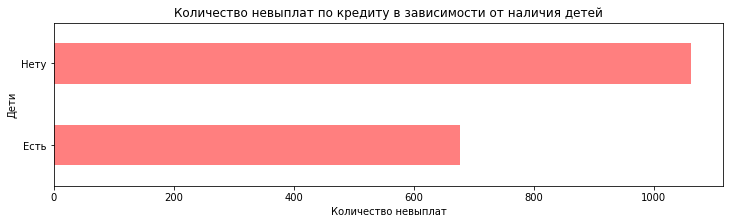

Задолженность,Да,Нет
Дети,,
Есть,678,6686
Нету,1063,13044


Доля невыплат по кредиту для клиентов  с детьми: 9.21% 
Доля невыплат по кредиту для клиентов  без детей: 7.54% 


In [37]:
# Создаю сводную таблицу 'data_pivot' в которой группирую данные по столбцу 'Дети' и притеняю функцию 'count' 
data_pivot = statistic.pivot_table(index = 'Дети', columns = 'Задолженность', values = 'Количество детей', aggfunc = 'count')

# Гистограмма "Невыплаты по кредиту в зависимости от наличия детей"
data_pivot.sort_values('Да', ascending=True).plot(kind='barh', y='Да', figsize=(12, 3), alpha=0.5, legend=False, color='red', title='Количество невыплат по кредиту в зависимости от наличия детей')
plt.xlabel('Количество невыплат')
plt.show()

# Вывожу таблицу на экран
display(data_pivot)

string = 'Доля невыплат по кредиту для клиентов'   # Переменная для удобства вывода текста
# Вычисляю долю невыплат по кредиту для каждой категории, по формуле: 'Задолженность ДА' / ('Задолженность НЕТ' + 'Задолженность ДА') 
print(string, ClrG, 'с детьми: {:.2%}'.format(data_pivot['Да']['Есть'] / (data_pivot['Нет']['Есть'] + data_pivot['Да']['Есть'])), ClrDef)      # Вывожу процент невыплат с детьми
print(string, ClrG, 'без детей: {:.2%}'.format(data_pivot['Да']['Нету'] / (data_pivot['Нет']['Нету'] + data_pivot['Да']['Нету'])), ClrDef)      # Вывожу процент невыплат без детей

### Вывод

Проведя анализ следует отметить, что доля невыплат по кредитам у __клиентов с детьми равна 9.21%__, а доля невыплат по кредитам у __клиентов без детей равна 7.54%__, что __на 1.67% меньше__. Следовательно можно сделать вывод о том, что зависимости между наличием детей у клиента и возвратом кредита в срок - __нету__.

<a id="num32"></a>
### 3.2 Определение зависимости между семейным положением и возвратом кредита в срок
Согласно описанию таблицы __'data'__, каждому уникальному значению столбца __'family_status_id__' соответствует определённое семейное положение:
* __0__:    женат / замужем     
* __1__:    гражданский брак      
* __2__:    вдовец / вдова       
* __3__:    в разводе           
* __4__:    Не женат / не замужем

Создаю сводную таблицу __'data_pivot'__ в которой сгруппирую столбцы __'Семейное положение'__ и __'Задолженность'__ и посчитаю количество значений.

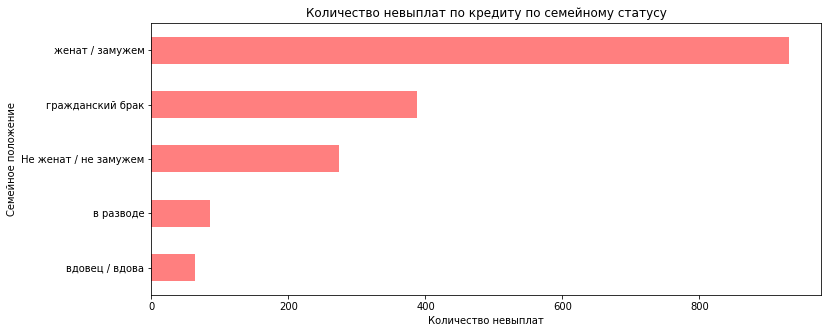

Задолженность,Да,Нет
Семейное положение,,
Не женат / не замужем,274,2536
в разводе,85,1110
вдовец / вдова,63,896
гражданский брак,388,3775
женат / замужем,931,11413


===== Доля невыплат по кредиту =====
 Для женат / замужем составляет 7.54% 
 Для гражданский брак составляет 9.32% 
 Для вдовец / вдова составляет 6.57% 
 Для в разводе составляет 7.11% 
 Для Не женат / не замужем составляет 9.75% 
===== Доля невыплат по кредиту =====
 Для семейных клиентов: 7.99% 
 Для не семейных клиентов: 8.50% 


In [38]:
# Создаю сводную таблицу 'data_pivot' в которой группирую данные по столбцу 'Семейное положение' и притеняю функцию 'count' 
data_pivot = statistic.pivot_table(index = 'Семейное положение', columns = 'Задолженность', values = 'Семья id', aggfunc = 'count')

# Гистограмма "Невыплаты по кредиту для каждого семейного статуса"
data_pivot.sort_values('Да', ascending=True).plot(kind='barh', y='Да', figsize=(12, 5), alpha=0.5, legend=False, color='red', title='Количество невыплат по кредиту по семейному статусу')
plt.xlabel('Количество невыплат')
plt.show()

# Вывожу таблицу на экран
display(data_pivot)

title = '===== Доля невыплат по кредиту ====='
print(title) 
# Список всех семейных статусов
family_status_list = ['женат / замужем', 'гражданский брак', 'вдовец / вдова', 'в разводе', 'Не женат / не замужем']
# Расчёт доля невыплат по кредиту для всех семейных категорий
for x in family_status_list:
    print(ClrG, 'Для', x, 'составляет {:.2%}'.format(data_pivot['Да'][x] / (data_pivot['Нет'][x] + data_pivot['Да'][x])), ClrDef)
print(title) 
family_yes = 1319 / (15188 + 1319)   # Вычисляю процент невыплат/ по кредиту для 'семейных клиентов'
family_no = 422 / (4542 + 422)       # Вычисляю процент невыплат по кредиту для 'не семейных клиентов'
print(ClrG, 'Для семейных клиентов: {:.2%}'.format(family_yes), ClrDef)    # Вывожу процент невыплат для 'семейных клиентов'
print(ClrG, 'Для не семейных клиентов: {:.2%}'.format(family_no), ClrDef)  # Вывожу процент невыплат для 'не семейных клиентов'

### Вывод
Проанализировав данные, можно сказать, что разница между долями невыплат по кредиту среди категорий семейных и не семейных клиентов составляет всего 0.51%. При этом некоторые категории заметно выделяются, например: __не женатые / не замужние__ имеют самую высокую долю невыплат по кредиту - __9.75%__, а такая категория как __вдовцы / вдовы__ имеют самую низкую долю невыплат по кредиту - __6.57%__. Поэтому отвечая на поставленный вопрос, можно сказать, что __зависимость между семейным положением возвратом кредита в срок Есть__, хоть и не очень заметная.

<a id="num33"></a>
### 3.3 Определение зависимости между уровнем дохода и возвратом кредита в срок
Создаю сводную таблицу __'data_pivot'__ в которой сгруппирую столбцы __'Уровень дохода'__ и __'Задолженность'__ и посчитаю количество значений.

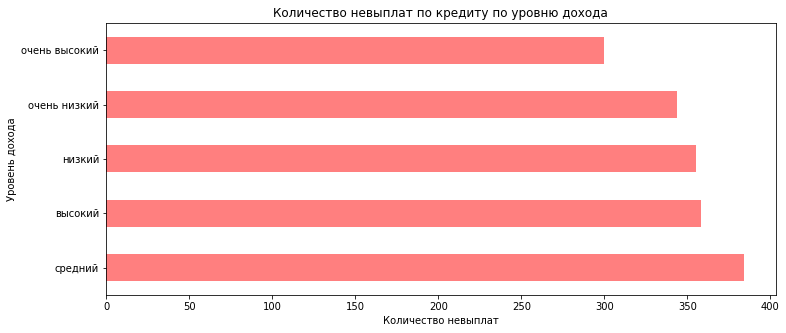

Задолженность,Да,Нет
Уровень дохода,,
высокий,358,3936
низкий,355,3939
очень высокий,300,3994
очень низкий,344,3951
средний,384,3910


=== Доля невыплат по кредиту для уровня дохода ===
очень низкий  8.01% 
низкий  8.27% 
средний  8.94% 
высокий  8.34% 
очень высокий  6.99% 


In [39]:
# Создаю сводную таблицу 'data_pivot' в которой группирую данные по столбцу 'Уровень дохода' и притеняю функцию 'count' 
data_pivot = statistic.pivot_table(index = 'Уровень дохода', columns = 'Задолженность', values = 'Доход', aggfunc = 'count')

# Гистограмма "Невыплаты по кредиту для каждого уровня дохода"
data_pivot.sort_values('Да', ascending=False).plot(kind='barh', y='Да', figsize=(12, 5), legend=False, alpha=0.5, color='red', title='Количество невыплат по кредиту по уровню дохода')
plt.xlabel('Количество невыплат')
plt.show()

# Вывожу таблицу на экран
display(data_pivot)   

# Вывод доли невыплат по кредиту для каждого уровня дохода
print('=== Доля невыплат по кредиту для уровня дохода ===')
income_status_list = ['очень низкий', 'низкий', 'средний', 'высокий', 'очень высокий'] # Список уровней дохода
# Расчёт доли невыплат по кредиту для каждого уровня дохода
for x in income_status_list:
    print(x, ClrG, '{:.2%}'.format(data_pivot['Да'][x] / (data_pivot['Нет'][x] + data_pivot['Да'][x])), ClrDef)

### Вывод
Проанализировав данные столбца __'Уровень дохода'__, важно отметить, что самый высокий показатель невыплат по кредиту у категории __Средний доход__, значение которой равно __8.94%__, что в свою очередь на __1.95%__ больше чем в категории __Очень высокий доход__ и на __0.93%__ выше чем в категории __Очень низкий доход__. Результаты анализа получились довольно неожиданными. Получается что средняя категория дохода имеет самый высокий процент невыплат по кредиту. 

Отвечая на поставленный вопрос: __"Есть ли зависимость между уровнем дохода и возвратом кредита в срок?"__ - можно сказать, что зависимость __есть__ и зависит от конкретной категория дохода. Чёткая тенденции снижений доли невыплат по кредиту в зависимости от роста уровня дохода начинает прослеживаться только после категории дохода __"Средний доход"__.

<a id="num34"></a>
### 3.4 Влияние цели кредита на его возврат в срок
Создаю сводную таблицу __'data_pivot'__ в которой сгруппирую столбцы __'Цель кредита'__ и __'Задолженность'__ и посчитаю количество значений.

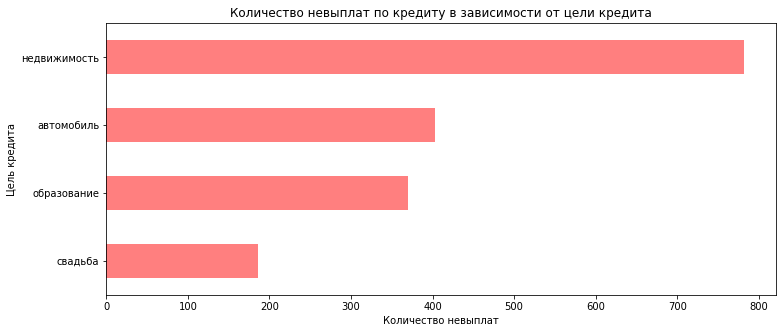

Задолженность,Да,Нет
Цель кредита,,
автомобиль,403,3905
недвижимость,782,10032
образование,370,3644
свадьба,186,2149


=== Доля невыплат по кредиту для цели кредита ===
автомобиль  9.35% 
недвижимость  7.23% 
образование  9.22% 
свадьба  7.97% 


In [40]:
# Создаю сводную таблицу 'data_pivot' в которой группирую данные по столбцу 'Цель кредита' и притеняю функцию 'count' 
data_pivot = statistic.pivot_table(index = 'Цель кредита', columns = 'Задолженность', values = 'Причина кредита', aggfunc = 'count')

# Гистограмма "Невыплаты по кредиту в зависимости от цели кредита"
data_pivot.sort_values('Да', ascending=True).plot(kind='barh', y='Да', figsize=(12, 5), alpha=0.5, legend=False, color='red', title='Количество невыплат по кредиту в зависимости от цели кредита')
plt.xlabel('Количество невыплат')
plt.show()

display(data_pivot)   # Вывожу таблицу на экран

# Расчёт доли невыплат по кредиту в зависимости от цели кредита
print('=== Доля невыплат по кредиту для цели кредита ===')
purpose_list = ['автомобиль', 'недвижимость', 'образование', 'свадьба']
for x in purpose_list:
    print(x, ClrG, '{:.2%}'.format(data_pivot['Да'][x] / (data_pivot['Нет'][x] + data_pivot['Да'][x])), ClrDef)

### Вывод
Разные цели кредита влияют на его возврат в срок следующим обазром: наиболее добросовестными плательщиками являются клиенты, которые берут кредит __на покупку недвижимости__, в данной категории __доля невыплат по кредиту составляет: 7.23%__, что является __самым низким показателем__ среди остальных категорий. Самые __недобросовестные плательщики по кредиту__ относятся к категории __"автомобиль"__, здесь __доля невыплат по кредиту составляет 9.35%__, что довольно много. Если составлять рейтинг добросовестности клиентов по целям кредита, то рейтинг будет выглядеть следующим образом: 
1. Недвижимость *(наиболее добросовестные плательщики)*
2. Свадьба
3. Образование
4. Автомобиль *(наименее добросовестные плательщики)*

<a id="num4"></a>
### Шаг 4. Общий вывод
В результате анализа информации, предоставленной кредитным отделом банка, мною были проверены следующие гипотезы:
* Есть ли зависимость между наличием детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?


Выводы по каждой гипотизе представлены выше. Исходя из полученных результатов исследований, можно составить "портрет наиболее добросовестного плательщика по кредиту" и соответственно "портрет наименее добросовестного плательщика по кредиту", которые представлены ниже:

* __Наиболее добросовестный плательщик обладает следующими параметрами__: 
    1. Вдовец / Вдова
    2. Не имеет детей
    3. Высокий уровень дохода
    4. Цель кредита: сделки с недвижимостью


* __Наименее добросовестный плательщик обладает следующими параметрами__: 
    1. Не женатый / не замужний
    2. Имеет детей
    3. Очень низкий уровень дохода
    4. Цель кредита: сделки с автомобилем